# Assigment 2

## Task 1

In [1]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt
from os import walk
%matplotlib inline
figsize = (15,22)

def _plot(img):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=plt.cm.gray)

In [3]:
def func(img, window_size):
    out = img.copy()
    R,C = img.shape
    vstep, hstep = window_size
    th = vstep*hstep / 2 
    for i in range(0, R-vstep, 10):
        for j in range(0, C-hstep, 10):
            white_count = np.count_nonzero(img[i:i+vstep,j:j+hstep])
            if white_count < th:
                out[i:i+vstep,j:j+hstep] = 255 - img[i:i+vstep,j:j+hstep]
    return out

def remove_black(img, window_size, th=3):
    out = img.copy()
    R,C = img.shape
    vstep, hstep = window_size
    for i in range(0, R-vstep):
        for j in range(0, C-hstep):
            white_count = np.count_nonzero(img[i:i+vstep,j:j+hstep])
            if white_count < th:
                out[i:i+vstep,j:j+hstep] = 255
    return out


def detect(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    bin_img = cv2.adaptiveThreshold(img, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 33, 7)
    out = func(bin_img, window_size=(30,60))
    out = remove_black(out, window_size=(5,20))
    out = remove_black(out, window_size=(30,5))
    return cv2.fastNlMeansDenoising(out, None, h=50, templateWindowSize=7, searchWindowSize=21)

Wall time: 11.5 s


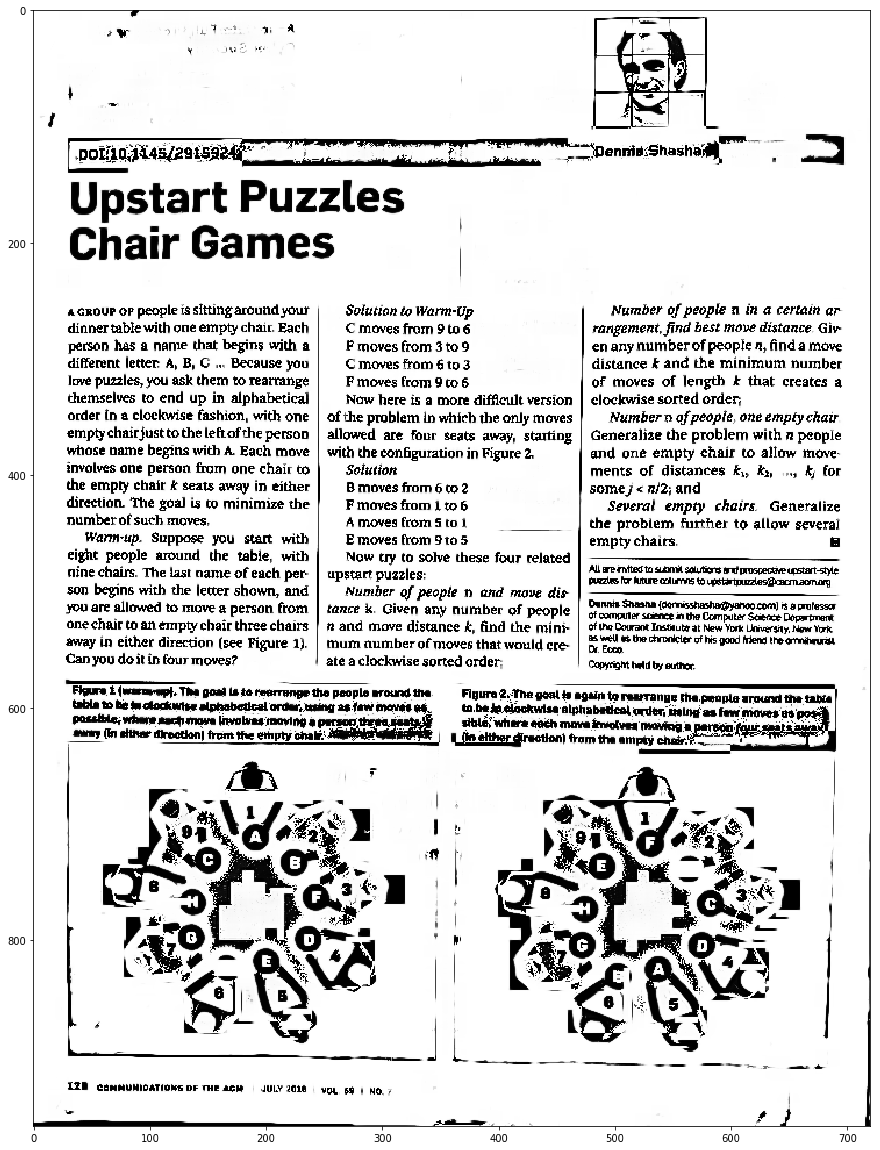

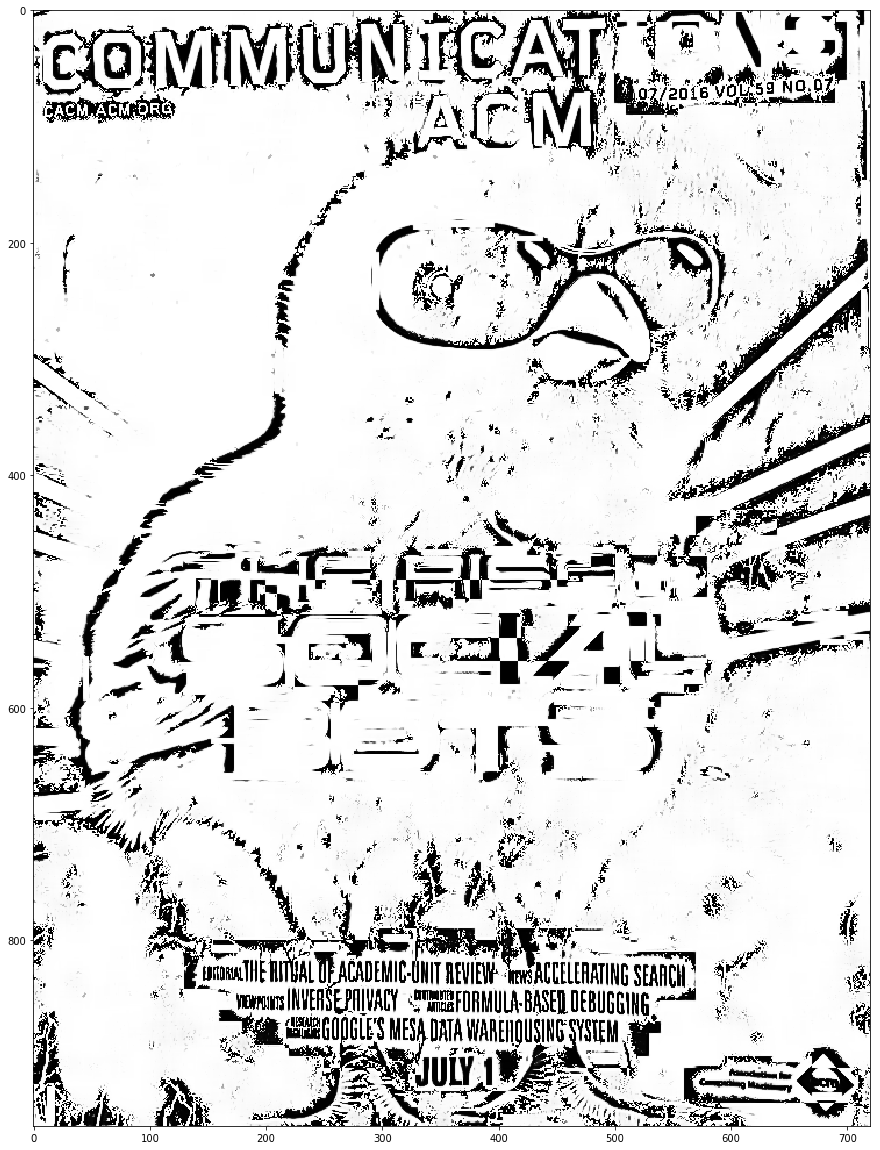

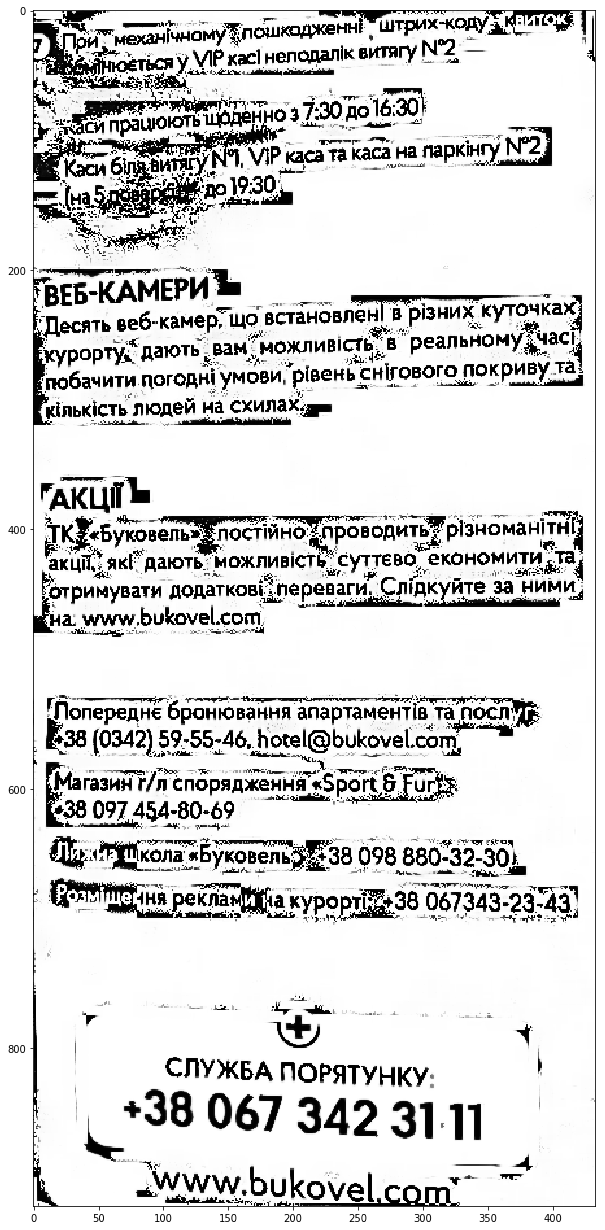

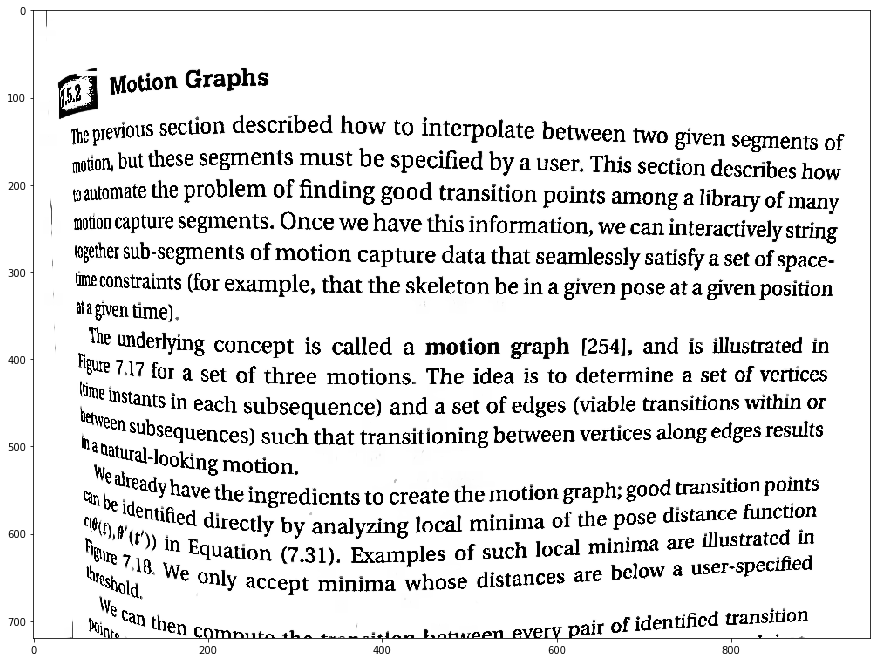

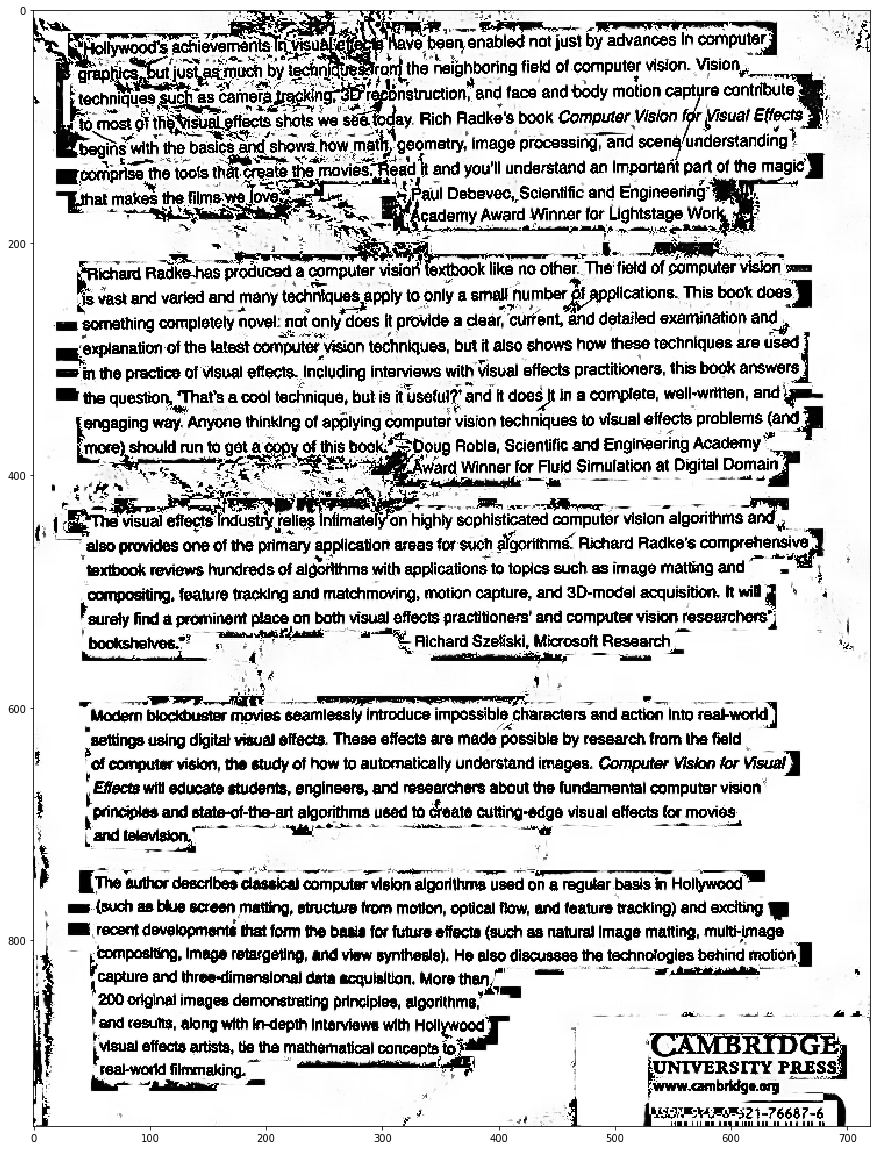

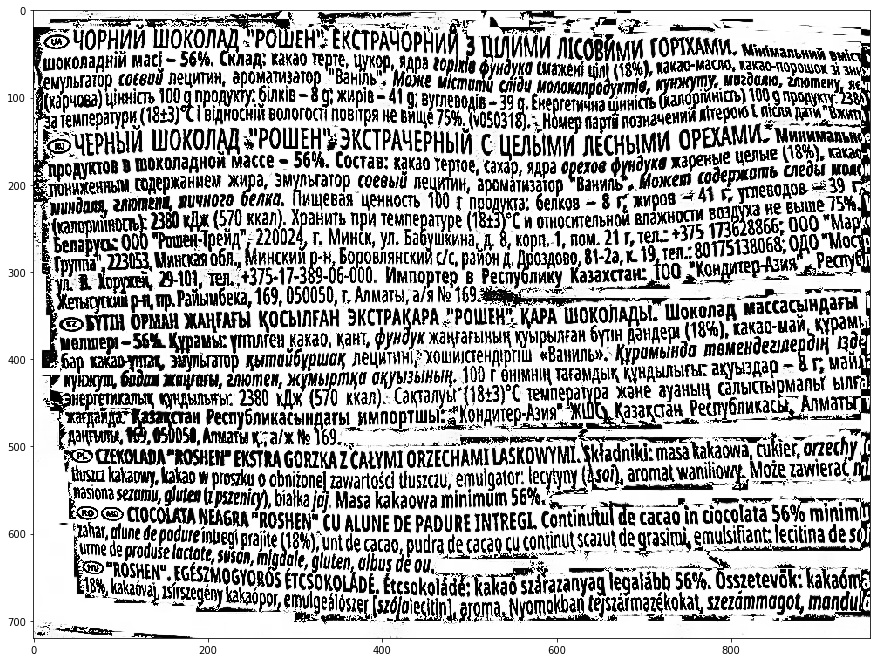

In [4]:
%%time
path = './res/text/'
for (_,_,files) in walk(path):
    for file in files:
        img = detect(path + file)
        _plot(img)

As we can see, text segmentation is performed quite good with a single set of parameters for all set of images except the second image is segmented badly. Thus we are forced to work with it differently. As we can see below, with another parameters result is far better

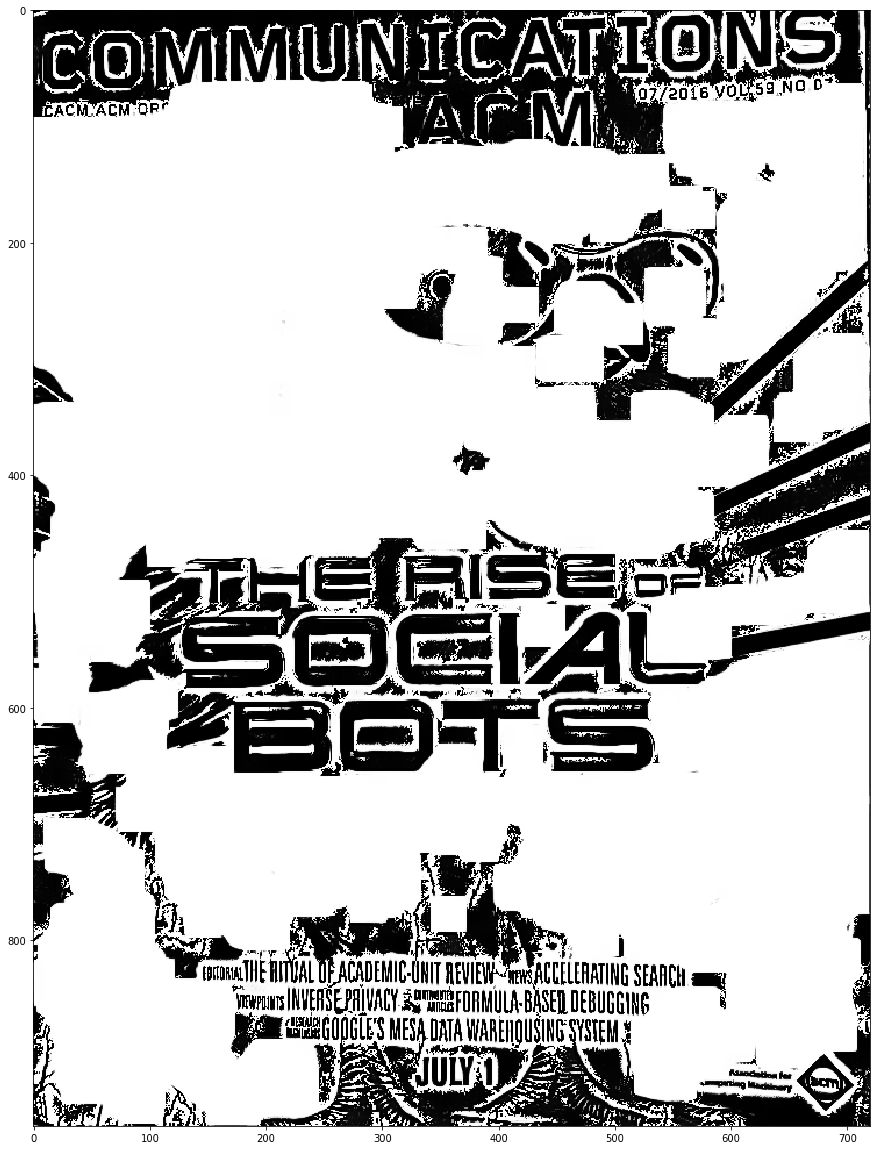

In [14]:
path = './res/text/text2.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.adaptiveThreshold(img, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 23, 7)
img = 255 - img
img = remove_black(img, window_size=(30,30), th=30*30/20)
img =  cv2.fastNlMeansDenoising(img, None, h=50, templateWindowSize=7, searchWindowSize=21)
_plot(img)

But we still could make it better with dillution and hardcoded eliminated areas, which will make it a little better, as we can see below

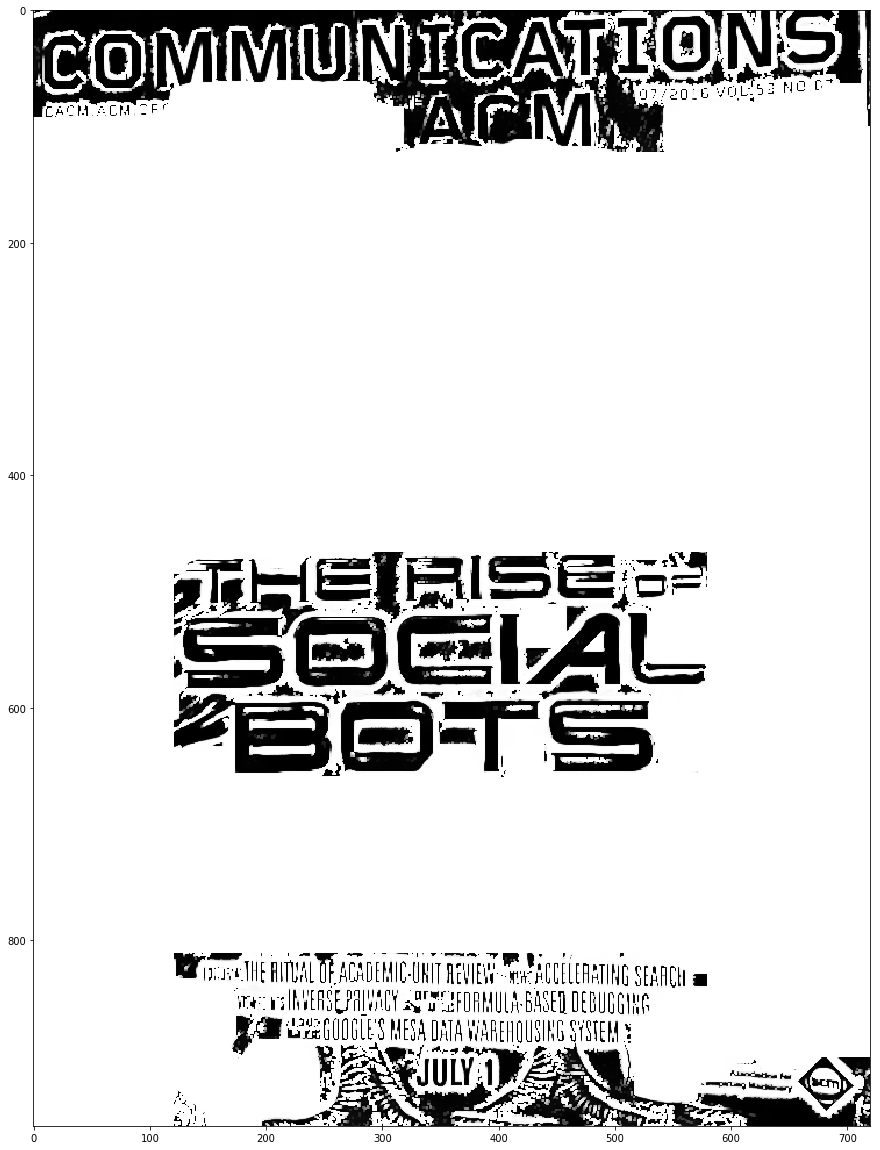

In [15]:
img[122:465,:] = img[660:810,:] = img[100:,:120] = img[100:900,580:] = 255
kernel = np.ones((2,2),np.uint8)
img = cv2.dilate(img,kernel,iterations = 1)
_plot(img)